# Exploration Exercises

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

pd.options.display.float_format = '{:20,.2f}'.format

from wrangle_zillow import prepare_zillow
import wrangle_zillow

## Tips Dataset
Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

You can load the data set like this:

`import seaborn as sns

sns.load_dataset('tips')`

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


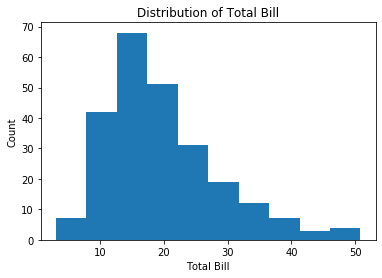

In [4]:
plt.hist(tips.total_bill)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.show()

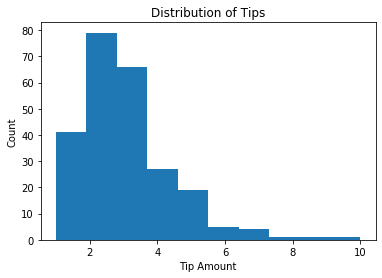

In [5]:
plt.hist(tips.tip)
plt.title('Distribution of Tips')
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.show()

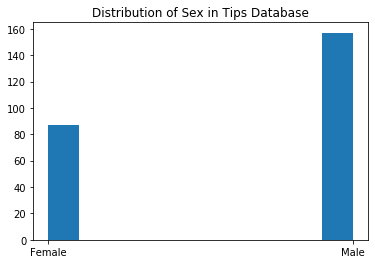

In [6]:
plt.hist(tips.sex)
plt.title('Distribution of Sex in Tips Database')
plt.show()

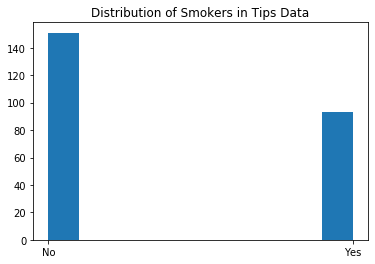

In [7]:
plt.hist(tips.smoker)
plt.title('Distribution of Smokers in Tips Data')
plt.show()

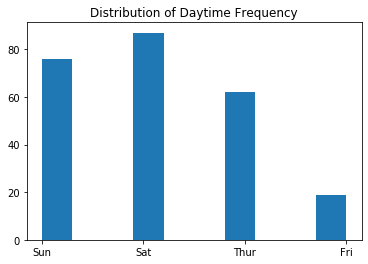

In [8]:
plt.hist(tips.day)
plt.title('Distribution of Daytime Frequency')
plt.show()

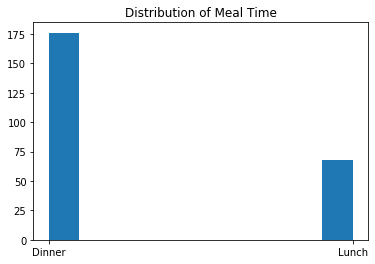

In [9]:
plt.hist(tips.time)
plt.title('Distribution of Meal Time')
plt.show()

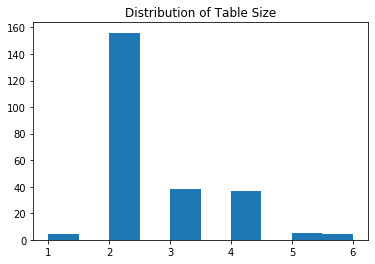

In [10]:
plt.hist(tips['size'])
plt.title('Distribution of Table Size')
plt.show()

### Question One:
Is there a difference in the average total bill between male and female customers?

$H_0$: There is no difference in the mean total bill between male and female customers

$H_a$: There is a difference in the mean total bill between male and female customers

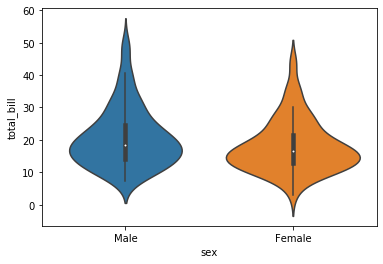

In [11]:
sns.violinplot(x = tips.sex, y = tips.total_bill)

In [12]:
# The data appears to have similar variance between sexes
alpha = 0.05
statistic, p = stats.ttest_ind(tips.total_bill[tips.sex == 'Male'], tips.total_bill[tips.sex == 'Female'])
statistic, p

(2.2777940289803134, 0.0236116668468594)

In [13]:
p < alpha

True

**We reject the null hypothesis. Men have a higher total bill on average than women.**

In [14]:
tips[tips.sex == 'Male'].total_bill.mean()

20.744076433121034

In [15]:
tips[tips.sex == 'Female'].total_bill.mean()

18.056896551724137

### Question Two:
Is smoking status dependent on sex?

$H_0$ A customer's smoking status is independent of their sex  
$H_a$ A customer's smoking status is dependent on their sex

In [16]:
ctab = pd.crosstab(tips.sex, tips.smoker)
ctab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [17]:
chi2, p, degf, expected = stats.chi2_contingency(ctab)
chi2, p

(0.008763290531773594, 0.925417020494423)

In [18]:
p < alpha

False

**We fail to reject the null hypothesis. Smoking status is independent of sex.**

## Zillow Dataset

In [19]:
train, validate, test = prepare_zillow()

In [20]:
train.head().T

,7561,63729,68688,70148,71810
id,2700737,639102,826154,2696314,1011588
parcelid,10845039,14474251,12006951,14369321,14334565
bathroomcnt,3.00,3.00,2.00,3.00,3.00
bedroomcnt,3.00,3.00,3.00,4.00,3.00
buildingqualitytypeid,8.00,6.64,6.00,6.64,6.64
calculatedfinishedsquarefeet,"1,376.00","2,106.00","1,834.00","2,246.00","2,662.00"
fips,Los Angeles,Orange,Los Angeles,Orange,Orange
fullbathcnt,3.00,3.00,2.00,3.00,3.00
heatingorsystemtypeid,2.00,2.00,7.00,2.00,2.00
latitude,"34,169,700.00","33,612,891.00","34,088,869.00","33,642,328.00","33,763,341.00"


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52538 entries, 7561 to 71294
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52538 non-null  object 
 1   parcelid                      52538 non-null  object 
 2   bathroomcnt                   52538 non-null  float64
 3   bedroomcnt                    52538 non-null  float64
 4   buildingqualitytypeid         52538 non-null  float64
 5   calculatedfinishedsquarefeet  52538 non-null  float64
 6   fips                          52538 non-null  object 
 7   fullbathcnt                   52538 non-null  float64
 8   heatingorsystemtypeid         52538 non-null  float64
 9   latitude                      52538 non-null  float64
 10  longitude                     52538 non-null  float64
 11  lotsizesquarefeet             52538 non-null  float64
 12  propertycountylandusecode     52538 non-null  object 
 13

In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,"52,538.00",2.29,0.95,0.00,2.00,2.00,3.00,13.00
bedroomcnt,"52,538.00",3.03,1.00,1.00,2.00,3.00,4.00,11.00
buildingqualitytypeid,"52,538.00",6.64,1.35,1.00,6.00,6.64,7.00,12.00
calculatedfinishedsquarefeet,"52,538.00","1,765.88",933.06,152.00,"1,175.00","1,530.00","2,081.00","20,612.00"
fullbathcnt,"52,538.00",2.22,0.93,1.00,2.00,2.00,3.00,13.00
heatingorsystemtypeid,"52,538.00",3.24,3.07,1.00,2.00,2.00,2.00,24.00
latitude,"52,538.00","34,006,927.94","269,558.73","33,339,527.00","33,806,528.50","34,019,094.00","34,176,950.00","34,818,767.00"
longitude,"52,538.00","-118,196,980.91","361,329.90","-119,475,265.00","-118,420,061.75","-118,167,860.50","-117,916,201.00","-117,554,636.00"
lotsizesquarefeet,"52,538.00","28,909.97","124,959.26",236.00,"5,999.00","7,283.00","10,900.00","6,971,010.00"
yearbuilt,"52,538.00","1,969.75",23.02,"1,880.00","1,954.00","1,971.00","1,987.00","2,016.00"


Create a python script or jupyter notebook named explore_zillow and do the following:  
- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- Answer those questions through a mix of statistical tests and visualizations.

In your exploration, be sure you include the following:  
a plot with at least 3 dimensions, such as x, y, and color.  
at least 3 different types of plots (like box, scatter, bar, ...)  
at least 2 statistical tests.  

- document takeaways/conclusions after each question is addressed.

Bonus:  
Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

## Five Questions:
### 1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

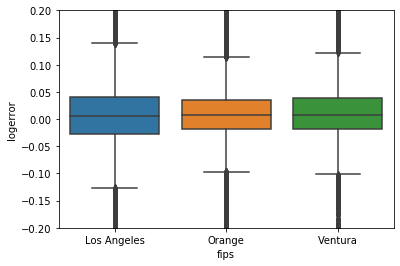

In [35]:
plt.ylim(-.2, .2) # Range of y-axis is trimmed to better visualize IQR
sns.boxplot(data=train, x=train.fips, y=train.logerror)

From visual inspection alone, there does not appear to be much difference. The bulk of the observations are all within the same interquartile range, with Los Angeles appearing to have a slightly wider IQR. All three means are very close to each other, with Orange county standing out as slightly higher.  

In [38]:
print(f'The mean logerror in Los Angeles County is {train.logerror[train.fips == "Los Angeles"].mean()}')
print(f'The mean logerror in Orange County is {train.logerror[train.fips == "Orange"].mean()}')
print(f'The mean logerror in Ventura County is {train.logerror[train.fips == "Ventura"].mean()}')

The mean logerror in Los Angeles County is 0.013665098443735674
The mean logerror in Orange County is 0.020886615557584278
The mean logerror in Ventura County is 0.016946686704946267


We can use a one-way Anova to determine if there is a meaningful difference in these means. The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

1. The samples are independent. (Appears to be True)
2. Each sample is from a normally distributed population. (Appears to be True)
3. The population standard deviations of the groups are all equal. (Appears to be True)

In [39]:
alpha = 0.05
F, p = stats.f_oneway(train.logerror[train.fips == 'Los Angeles'], train.logerror[train.fips == 'Orange'], train.logerror[train.fips == 'Ventura'])
F, p

(10.245780998894892, 3.557799222907208e-05)

In [40]:
p < alpha

True

#### Takeaways:
- There does appear to be a significant difference in the means of each county. There is approximately a .007 difference between the lowest mean logerror (Los Angeles) and the highest mean logerror (Orange). A post-hoc test or two will need to be run to determine which of the means are different from each other. 

### 2. Is there a relationship between taxvaluedollarcnt and logerror?

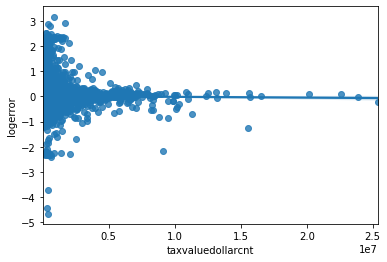

In [41]:
sns.regplot(data=train, x=train.taxvaluedollarcnt, y= train.logerror)

Visual inspection of a scatterplot with line of best fit demonstrates that there is no linear relationship between `logerror` and `taxvaluedollarcnt`, but there is clearly a pattern being represented. The variance of the `logerror` increases as `taxvaluedollarcnt` decreases. We can look at this in more detail.

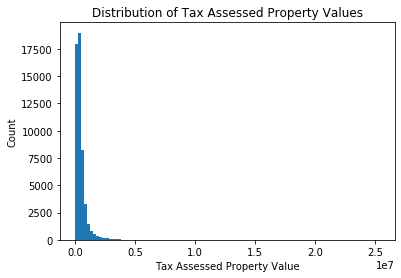

In [43]:
plt.hist(train.taxvaluedollarcnt, bins = 100)
plt.title('Distribution of Tax Assessed Property Values')
plt.xlabel('Tax Assessed Property Value')
plt.ylabel('Count')
plt.show()

In [45]:
train.taxvaluedollarcnt.describe()

count              52,538.00
mean              490,629.11
std               623,934.01
min                 9,242.00
25%               207,106.00
50%               360,643.50
75%               571,000.00
max            25,381,250.00
Name: taxvaluedollarcnt, dtype: float64

We can bin the distribution of tax assessed property values into quartiles, then look at the mean log error within each quartile.

In [46]:
train['tax_assessed_value'] = pd.qcut(train['taxvaluedollarcnt'], q=4)
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,tax_assessed_value
7561,2700737,10845039,3.00,3.00,8.00,"1,376.00",Los Angeles,3.00,2.00,"34,169,700.00",...,"39,531.00","79,684.00","40,153.00",993.82,"60,371,285,002,016.00",0.00,2017-02-02,Central,Condominium,"(9241.999, 207106.0]"
63729,639102,14474251,3.00,3.00,6.64,"2,106.00",Orange,3.00,2.00,"33,612,891.00",...,"64,036.00","109,867.00","45,831.00","1,078.64","60,590,320,031,003.00",0.01,2017-08-04,Central,Single Family Residential,"(9241.999, 207106.0]"
68688,826154,12006951,2.00,3.00,6.00,"1,834.00",Los Angeles,2.00,7.00,"34,088,869.00",...,"123,298.00","266,097.00","142,799.00","3,237.83","60,371,915,002,002.00",0.12,2017-08-22,Floor/Wall,Single Family Residential,"(207106.0, 360643.5]"
70148,2696314,14369321,3.00,4.00,6.64,"2,246.00",Orange,3.00,2.00,"33,642,328.00",...,"212,159.00","597,133.00","384,974.00","6,207.12","60,590,524,243,009.00",0.01,2017-08-25,Central,Single Family Residential,"(571000.0, 25381250.0]"
71810,1011588,14334565,3.00,3.00,6.64,"2,662.00",Orange,3.00,2.00,"33,763,341.00",...,"150,976.00","847,794.00","696,818.00","9,479.72","60,590,756,063,003.00",-0.11,2017-08-30,Central,Single Family Residential,"(571000.0, 25381250.0]"


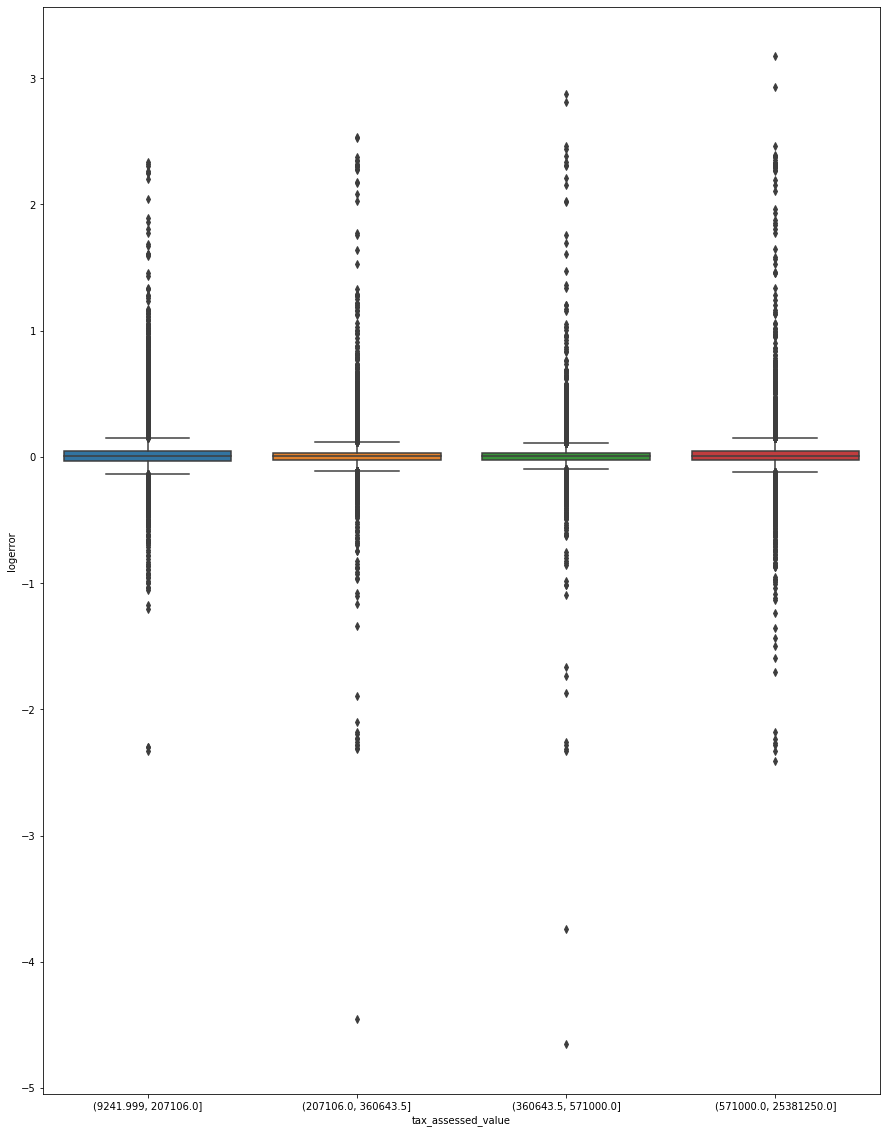

In [50]:
plt.figure(figsize=(15, 20))
sns.boxplot(data=train, x='tax_assessed_value', y='logerror')

It's difficult to see differences for the bulk of the data (IQR), so we'll zoom in on that segment of the chart.

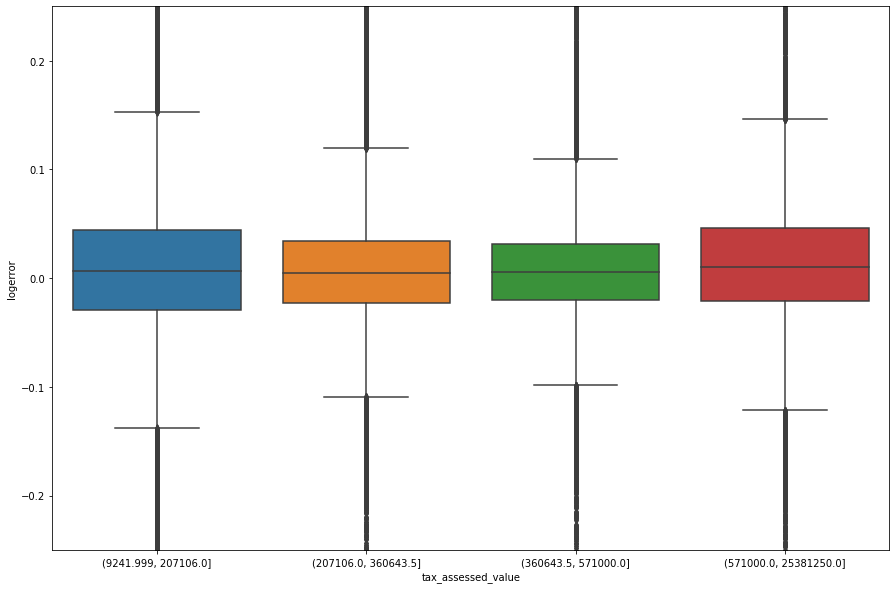

In [53]:
plt.figure(figsize=(15, 10))
plt.ylim(-.25, .25)
sns.boxplot(data=train, x='tax_assessed_value', y='logerror')

The interquartile range is highest for the lowest quartile of tax assessed property values. IQR decreases in the 2nd quartile, decreases even more in the 3rd quartile, and then increases again for the fourth quartile. Median logerror appears to actually be the highest for the 4th quartile.

In [66]:
# Not sure why this is showing incorrect values, perhaps rounding errors?
train.groupby('tax_assessed_value').logerror.mean()

tax_assessed_value
(9241.999, 207106.0]                     0.02
(207106.0, 360643.5]                     0.01
(360643.5, 571000.0]                     0.01
(571000.0, 25381250.0]                   0.02
Name: logerror, dtype: float64

In [75]:
# This doesn't correctly create a boolean mask because the values generated by cut and qcut are special Interval objects, not strings
(train.tax_assessed_value == '(9241.999, 207106.0]')

7561     False
63729    False
68688    False
70148    False
71810    False
         ...  
65866    False
53351    False
60438    False
28380    False
71294    False
Name: tax_assessed_value, Length: 52538, dtype: bool

In [76]:
# This creates a boolean mask for a bin
train.tax_assessed_value.isin((9241.999, 207106.0))

7561      True
63729     True
68688    False
70148    False
71810    False
         ...  
65866     True
53351    False
60438    False
28380     True
71294    False
Name: tax_assessed_value, Length: 52538, dtype: bool

In [78]:
first_quartile_logerror_mean = train.logerror[train.tax_assessed_value.isin((9241.999, 207106.0))].mean()
second_quartile_logerror_mean = train.logerror[train.tax_assessed_value.isin((207106.0, 360643.5))].mean()
third_quartile_logerror_mean = train.logerror[train.tax_assessed_value.isin((360643.5, 571000.0))].mean()
fourth_quartile_logerror_mean = train.logerror[train.tax_assessed_value.isin((571000.0, 25381250.0))].mean()
print('Mean Logerror in Each Quartile:')
print(f'1st Quartile: {first_quartile_logerror_mean}')
print(f'2nd Quartile: {second_quartile_logerror_mean}')
print(f'3rd Quartile: {third_quartile_logerror_mean}')
print(f'4th Quartile: {fourth_quartile_logerror_mean}')

Mean Logerror in Each Quartile:
1st Quartile: 0.021292431586636153
2nd Quartile: 0.0177923232078399
3rd Quartile: 0.012510924532144006
4th Quartile: 0.014076960419758424


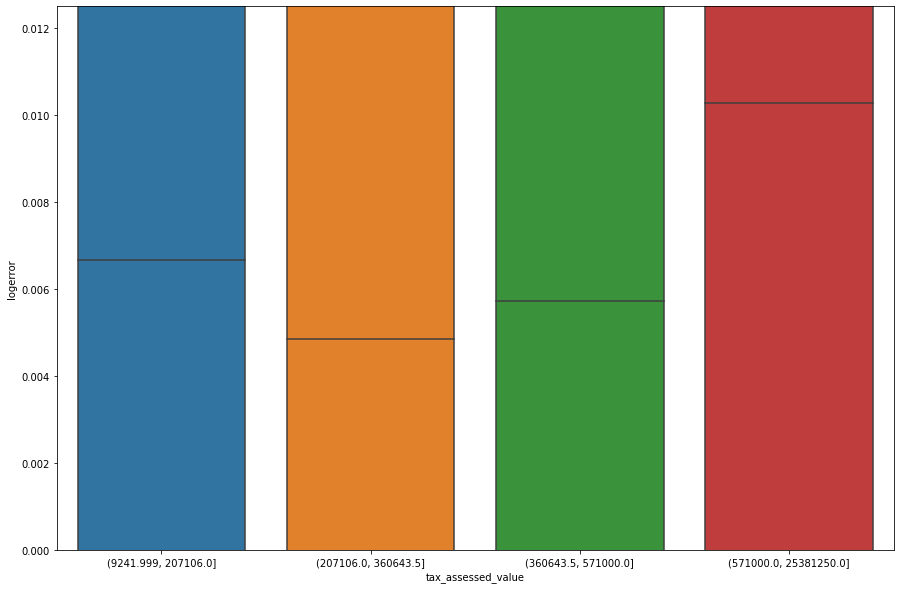

In [70]:
plt.figure(figsize=(15, 10))
plt.ylim(0, .0125)
sns.boxplot(data=train, x='tax_assessed_value', y='logerror')

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

1. The samples are independent. (Appears to be True)
2. Each sample is from a normally distributed population. (Appears to be True)
3. The population standard deviations of the groups are all equal. (Not sure)

In [79]:
alpha = 0.05
F, p = stats.f_oneway(train.logerror[train.tax_assessed_value.isin((9241.999, 207106.0))], train.logerror[train.tax_assessed_value.isin((207106.0, 360643.5))], train.logerror[train.tax_assessed_value.isin((360643.5, 571000.0))], train.logerror[train.tax_assessed_value.isin((571000.0, 25381250.0))])
F, p

(11.324217276695936, 2.0136528480411898e-07)

In [80]:
p < alpha

True

#### Takeaways:
Mean logerror is highest for the 1st quartile or property values and lowest for the 3rd quartile of property values. Anova test shows that there is a statistically sigificant difference in the means of the four quartiles. Post-hoc tests will need to be run to determine which of the means are significantly different from each other and in what way.

### 3. Does logerror increase with calculatedfinishedsquarefeet?

### 4. Are there differences in logerror based on the type of property (propertylandusetypeid)?

### 5. Are older houses more difficult to accurately predict than newer houses (yearbuilt)?

### BONUS: Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.